In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Dataset Path (Same as your data.yaml)
dataset_path = "/content/drive/MyDrive/yolov8_dataset"

# Checkpoint Save Directory in Google Drive
save_dir = "/content/drive/MyDrive/yolov8_training_checkpoints"
os.makedirs(save_dir, exist_ok=True)

# Verify Dataset Exists
assert os.path.exists(dataset_path), "Dataset folder not found in Google Drive!"


In [ ]:
from ultralytics import YOLO

# Load YOLOv8n model
model = YOLO('yolov8n.pt')

# Train with automatic checkpoint saving
results = model.train(
    data=f"{dataset_path}/data.yaml",
    epochs=100,
    batch=16,
    imgsz=640,
    device="cuda",
    save=True,  # Save best model
    project=save_dir,
    name="yolov8n_training",
    # resume=True  # Resume if interrupted
)


Ultralytics 8.3.79 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/yolov8_dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/MyDrive/yolov8_training_checkpoints, name=yolov8n_training, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

train: Scanning /content/drive/MyDrive/yolov8_dataset/train/labels.cache... 6995 images, 1 backgrounds, 0 corrupt: 100%|██████████| 6995/6995 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/yolov8_dataset/valid/labels.cache... 1995 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1995/1995 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolov8_training_checkpoints/yolov8n_training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolov8_training_checkpoints/yolov8n_training
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.17G      1.011      3.032       1.53         12        640: 100%|██████████| 438/438 [03:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.19it/s]


                   all       1995       2000      0.334      0.576      0.466      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.09G     0.9109      2.136      1.415         10        640: 100%|██████████| 438/438 [02:58<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:38<00:00,  1.65it/s]


                   all       1995       2000      0.486      0.634      0.621      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.07G     0.9455      1.921      1.427         11        640: 100%|██████████| 438/438 [02:56<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.26it/s]


                   all       1995       2000       0.54      0.609      0.599      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.06G     0.9602      1.761      1.428          8        640: 100%|██████████| 438/438 [02:57<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.18it/s]


                   all       1995       2000      0.581      0.605      0.615      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.07G     0.9271      1.604      1.396          8        640: 100%|██████████| 438/438 [02:56<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.28it/s]


                   all       1995       2000      0.558      0.726      0.677        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.05G     0.8982      1.459      1.371         11        640: 100%|██████████| 438/438 [02:57<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.30it/s]


                   all       1995       2000      0.638      0.757      0.698      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.05G     0.8567      1.342      1.345         10        640: 100%|██████████| 438/438 [03:00<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.23it/s]


                   all       1995       2000      0.641      0.751       0.75      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.05G     0.8387       1.29      1.332          8        640: 100%|██████████| 438/438 [02:58<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.25it/s]


                   all       1995       2000      0.613      0.745      0.606      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.05G     0.8089       1.22      1.307         12        640: 100%|██████████| 438/438 [02:58<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.27it/s]

                   all       1995       2000      0.686      0.834      0.743      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.04G     0.8036      1.203      1.308         12        640: 100%|██████████| 438/438 [02:59<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.30it/s]


                   all       1995       2000      0.743      0.825      0.798      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.05G      0.779      1.143      1.286          7        640: 100%|██████████| 438/438 [02:58<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.33it/s]


                   all       1995       2000      0.735      0.824      0.814      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.05G     0.7823      1.131       1.29          7        640: 100%|██████████| 438/438 [02:57<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.26it/s]


                   all       1995       2000      0.796      0.859      0.871      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.06G     0.7628      1.087      1.278         10        640: 100%|██████████| 438/438 [02:58<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.27it/s]


                   all       1995       2000      0.715      0.905      0.789       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.05G     0.7559      1.073      1.274         12        640: 100%|██████████| 438/438 [02:58<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.21it/s]

                   all       1995       2000      0.837      0.855      0.897      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.05G     0.7519      1.056      1.268          5        640: 100%|██████████| 438/438 [02:58<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.25it/s]

                   all       1995       2000      0.736      0.896      0.802      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.05G     0.7472      1.039      1.267         12        640: 100%|██████████| 438/438 [02:58<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.22it/s]


                   all       1995       2000      0.731      0.883      0.794      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.06G     0.7347      1.011      1.262          9        640: 100%|██████████| 438/438 [02:59<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:29<00:00,  2.15it/s]

                   all       1995       2000      0.815      0.869      0.894      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.05G     0.7277     0.9966      1.253         10        640: 100%|██████████| 438/438 [02:58<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.22it/s]

                   all       1995       2000      0.775      0.877      0.838      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.05G     0.7227     0.9709      1.255         10        640: 100%|██████████| 438/438 [03:00<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.19it/s]

                   all       1995       2000      0.775      0.892      0.858      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.05G     0.7132     0.9416      1.245         10        640: 100%|██████████| 438/438 [03:00<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.30it/s]

                   all       1995       2000      0.797      0.891      0.857      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.05G     0.7147     0.9511      1.248         10        640: 100%|██████████| 438/438 [02:56<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.18it/s]

                   all       1995       2000      0.812      0.884      0.871      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.05G     0.7014     0.9283      1.242          9        640: 100%|██████████| 438/438 [02:56<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.21it/s]

                   all       1995       2000      0.857      0.885      0.917      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.05G     0.7055     0.9131      1.243          9        640: 100%|██████████| 438/438 [02:55<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.20it/s]

                   all       1995       2000      0.806      0.916      0.878      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.05G     0.7007     0.8906      1.237          8        640: 100%|██████████| 438/438 [02:55<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.20it/s]

                   all       1995       2000      0.794       0.89      0.871      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.05G        0.7     0.9023      1.235         10        640: 100%|██████████| 438/438 [02:56<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.21it/s]


                   all       1995       2000      0.869      0.848      0.912      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.05G     0.6949     0.8803       1.23         11        640: 100%|██████████| 438/438 [02:56<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.24it/s]


                   all       1995       2000       0.85      0.891      0.908      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.05G      0.677     0.8577      1.222          9        640: 100%|██████████| 438/438 [02:55<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:29<00:00,  2.15it/s]

                   all       1995       2000      0.849      0.929      0.926      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.05G     0.6753     0.8412      1.219          8        640: 100%|██████████| 438/438 [02:57<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.24it/s]


                   all       1995       2000      0.916        0.9      0.952      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.05G     0.6727     0.8445      1.216          7        640: 100%|██████████| 438/438 [02:54<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.25it/s]


                   all       1995       2000        0.9      0.904      0.944      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.05G     0.6725     0.8242      1.215          7        640: 100%|██████████| 438/438 [02:55<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.23it/s]

                   all       1995       2000      0.919      0.903      0.946      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.05G      0.671     0.8257      1.215         12        640: 100%|██████████| 438/438 [03:00<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.20it/s]

                   all       1995       2000      0.878        0.9      0.923      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.05G     0.6637     0.8005       1.21         10        640: 100%|██████████| 438/438 [02:55<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.17it/s]

                   all       1995       2000      0.936      0.927       0.96      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.05G     0.6622     0.7963      1.213         11        640: 100%|██████████| 438/438 [02:58<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.21it/s]

                   all       1995       2000       0.92      0.926      0.959      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.05G     0.6599     0.8018      1.208          7        640: 100%|██████████| 438/438 [02:56<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.31it/s]


                   all       1995       2000      0.925      0.917      0.953      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.05G     0.6637     0.7945      1.213         10        640: 100%|██████████| 438/438 [02:53<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.29it/s]


                   all       1995       2000      0.926      0.934      0.957      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.05G     0.6496     0.7878      1.202          5        640: 100%|██████████| 438/438 [02:54<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.25it/s]

                   all       1995       2000       0.95      0.955      0.975      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.05G     0.6479     0.7792      1.197         10        640: 100%|██████████| 438/438 [02:53<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.27it/s]

                   all       1995       2000      0.938      0.929      0.964      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.05G       0.65     0.7758      1.201          8        640: 100%|██████████| 438/438 [02:53<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.28it/s]

                   all       1995       2000      0.922      0.925      0.959      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.05G     0.6409     0.7671      1.195          8        640: 100%|██████████| 438/438 [02:54<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.29it/s]

                   all       1995       2000      0.948      0.939       0.97      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.05G     0.6408     0.7601      1.193          8        640: 100%|██████████| 438/438 [02:54<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.23it/s]

                   all       1995       2000      0.913      0.928      0.957      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.05G       0.63     0.7477      1.186          5        640: 100%|██████████| 438/438 [02:54<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.26it/s]

                   all       1995       2000      0.903      0.926      0.951      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.04G      0.634     0.7488      1.188          8        640: 100%|██████████| 438/438 [02:54<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.27it/s]

                   all       1995       2000      0.945       0.95      0.973      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.05G     0.6345     0.7451       1.19          9        640: 100%|██████████| 438/438 [02:52<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.28it/s]

                   all       1995       2000      0.942      0.941      0.971      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.05G     0.6358     0.7403      1.189          9        640: 100%|██████████| 438/438 [02:53<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.27it/s]

                   all       1995       2000      0.936      0.951      0.972      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.05G     0.6269     0.7267      1.184         12        640: 100%|██████████| 438/438 [02:52<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.28it/s]

                   all       1995       2000      0.961      0.955      0.976      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.05G     0.6262     0.7251      1.181          9        640: 100%|██████████| 438/438 [02:53<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.31it/s]

                   all       1995       2000      0.945      0.954      0.971      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.05G     0.6248     0.7162      1.184         12        640: 100%|██████████| 438/438 [02:51<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.26it/s]

                   all       1995       2000      0.952      0.953      0.976       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.05G     0.6214     0.7174      1.179         12        640: 100%|██████████| 438/438 [02:53<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.30it/s]

                   all       1995       2000      0.962      0.949      0.978      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.05G     0.6209     0.7088      1.179          7        640: 100%|██████████| 438/438 [02:55<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.32it/s]


                   all       1995       2000      0.948      0.947      0.971       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.05G     0.6192     0.7034       1.18         12        640: 100%|██████████| 438/438 [02:50<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.26it/s]

                   all       1995       2000      0.944      0.948      0.974      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.05G     0.6076     0.6955      1.173          8        640: 100%|██████████| 438/438 [02:55<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.29it/s]

                   all       1995       2000      0.956      0.952      0.975      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.05G     0.6104     0.6988      1.173          8        640: 100%|██████████| 438/438 [02:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.28it/s]

                   all       1995       2000       0.94      0.956      0.973      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.05G      0.614     0.6918      1.173          9        640: 100%|██████████| 438/438 [02:54<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.29it/s]

                   all       1995       2000      0.943      0.952      0.972      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.04G     0.6025     0.6779      1.171          8        640: 100%|██████████| 438/438 [02:51<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.31it/s]

                   all       1995       2000      0.957      0.952      0.977      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.05G      0.596     0.6696      1.166          6        640: 100%|██████████| 438/438 [02:54<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.32it/s]

                   all       1995       2000      0.952      0.958      0.975      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.05G     0.6068     0.6764      1.168         11        640: 100%|██████████| 438/438 [02:55<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.27it/s]


                   all       1995       2000      0.965      0.947       0.98      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.05G     0.6051     0.6723      1.165         10        640: 100%|██████████| 438/438 [02:57<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.30it/s]

                   all       1995       2000      0.953      0.955      0.976      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.05G     0.5977      0.669      1.163          9        640: 100%|██████████| 438/438 [02:53<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.29it/s]

                   all       1995       2000      0.961      0.957      0.977      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.05G     0.5941     0.6615      1.163          8        640: 100%|██████████| 438/438 [02:55<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.29it/s]

                   all       1995       2000      0.951       0.96      0.975      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.03G     0.6104     0.6735      1.172         52        640:  29%|██▉       | 128/438 [00:49<01:40,  3.09it/s]


image 1/1 /content/drive/MyDrive/images/50.jpg: 320x640 1 fifty, 127.3ms
Speed: 3.3ms preprocess, 127.3ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict2


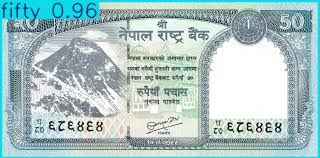

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/yolov8_training_checkpoints/yolov8n_training/weights/best.pt')  # or last.pt

# Perform inference on an image
results = model('/content/drive/MyDrive/images/50.jpg', save=True)

# Display the results
results[0].show()



image 1/1 /content/drive/MyDrive/images/50fake.jpg: 640x640 1 fake, 256.8ms
Speed: 4.9ms preprocess, 256.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


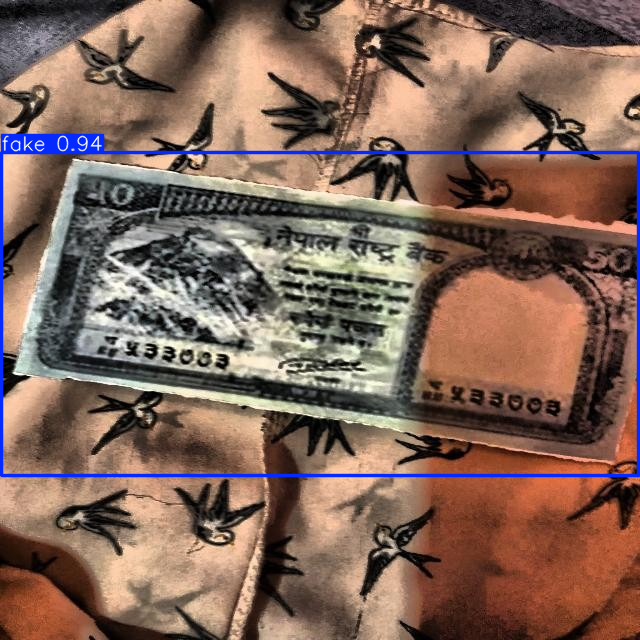

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/yolov8_training_checkpoints/yolov8n_training/weights/best.pt')  # or last.pt

# Perform inference on an image
results = model('/content/drive/MyDrive/images/50fake.jpg', save=True)

# Display the results
results[0].show()


In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/yolov8_training_checkpoints/yolov8n_training/weights/best.pt')  # or last.pt

# Perform inference on an image
results = model('/content/drive/MyDrive/images/IMG_20230523_114550_jpg.rf.14ffea2892beff5f4aedaac9bebe608a.jpg', save=True)

# Display the results
results[0].show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/yolov8_training_checkpoints/yolov8n_training/weights/best.pt')  # or last.pt

# Perform inference on an image
results = model('/content/drive/MyDrive/images/100f.jpg', save=True)

# Display the results
results[0].show()


Output hidden; open in https://colab.research.google.com to view.


image 1/1 /content/drive/MyDrive/images/train_fifty_946.jpg: 480x640 1 fifty, 127.4ms
Speed: 2.0ms preprocess, 127.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict6


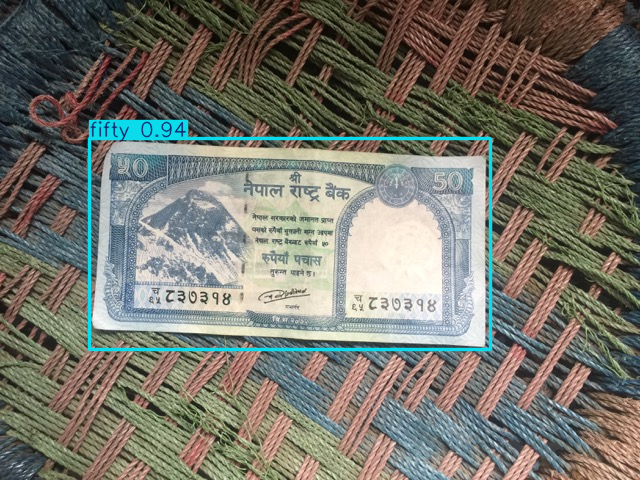

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/yolov8_training_checkpoints/yolov8n_training/weights/best.pt')  # or last.pt

# Perform inference on an image
results = model('/content/drive/MyDrive/images/train_fifty_946.jpg', save=True)

# Display the results
results[0].show()



image 1/1 /content/drive/MyDrive/images/Screenshot 2025-02-26 134215.png: 320x640 1 fivehundred, 81.9ms
Speed: 2.1ms preprocess, 81.9ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict7


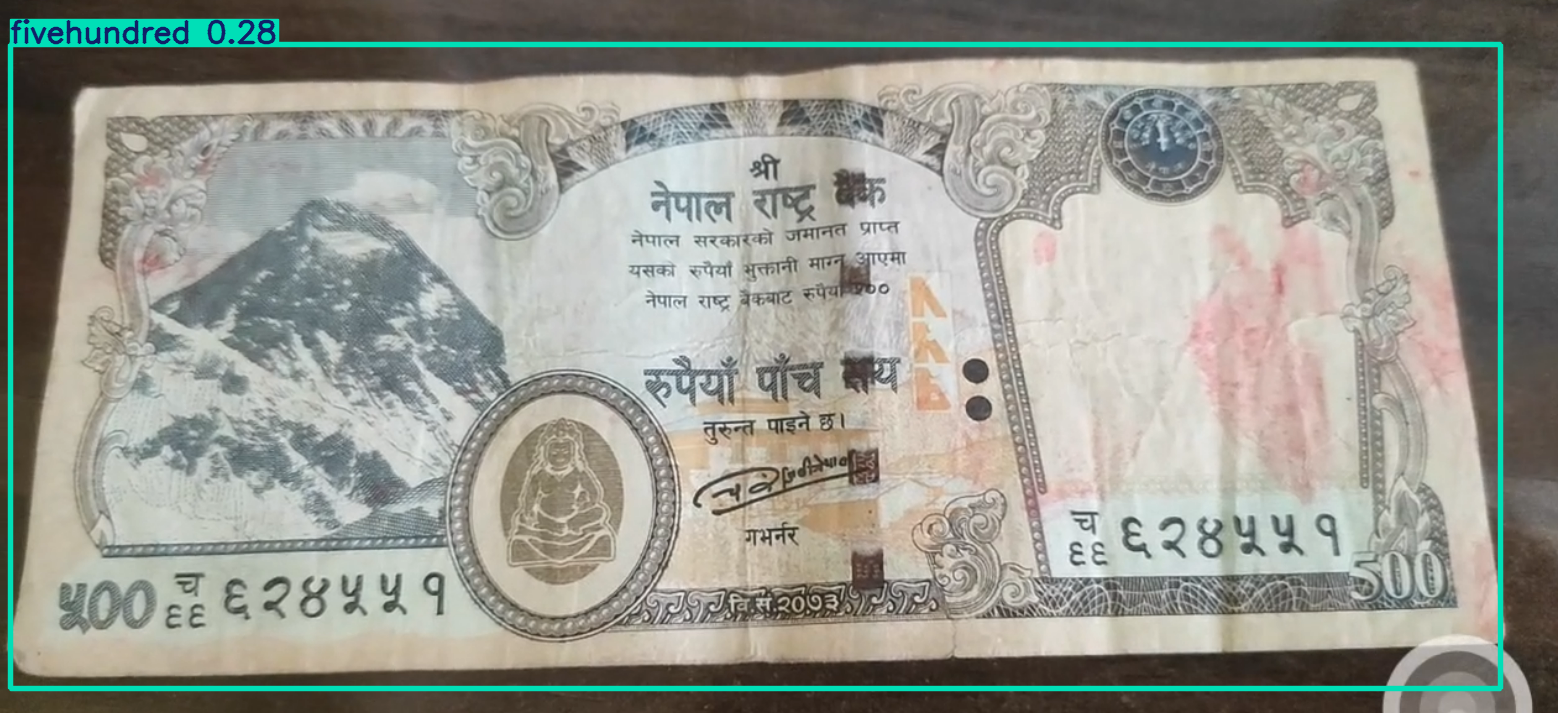

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/yolov8_training_checkpoints/yolov8n_training/weights/best.pt')  # or last.pt

# Perform inference on an image
results = model('/content/drive/MyDrive/images/Screenshot 2025-02-26 134215.png', save=True)

# Display the results
results[0].show()



image 1/1 /content/drive/MyDrive/images/20221216_181236_jpg.rf.1419a383c25c14d630c63e64b30da256.jpg: 640x640 1 fake, 152.4ms
Speed: 3.3ms preprocess, 152.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict8


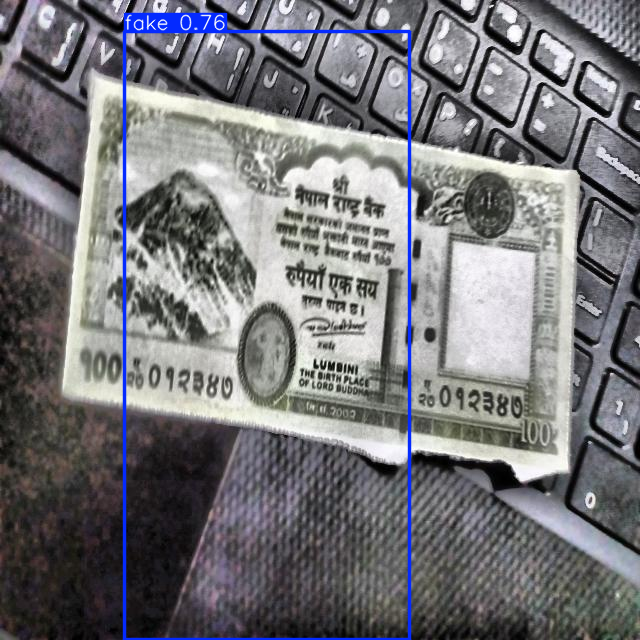

In [ ]:

from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/yolov8_training_checkpoints/yolov8n_training/weights/best.pt')  # or last.pt

# Perform inference on an image
results = model('/content/drive/MyDrive/images/20221216_181236_jpg.rf.1419a383c25c14d630c63e64b30da256.jpg', save=True)

# Display the results
results[0].show()



image 1/1 /content/drive/MyDrive/images/five.jpg: 640x640 1 five, 12.0ms
Speed: 3.5ms preprocess, 12.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


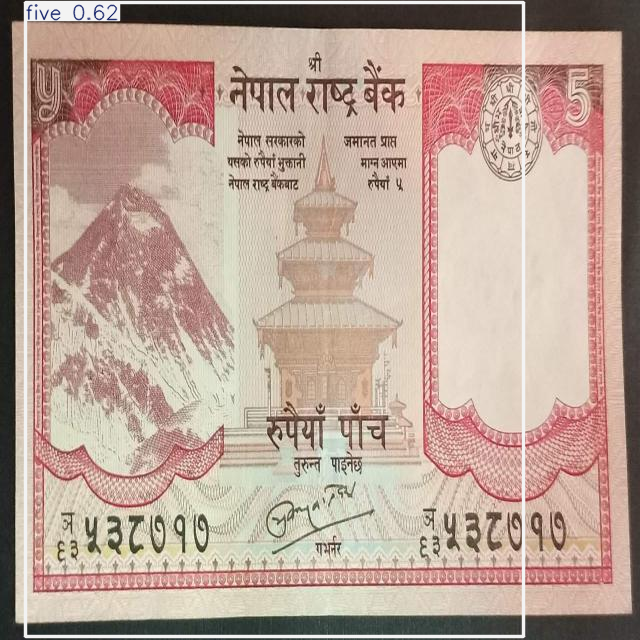

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/yolov8_training_checkpoints/yolov8n_training/weights/best.pt')  # or last.pt

# Perform inference on an image
results = model('/content/drive/MyDrive/images/five.jpg', save=True)

# Display the results
results[0].show()


image 1/1 /content/drive/MyDrive/images/fake1000.jpg: 640x640 1 fake, 7.8ms
Speed: 2.6ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict8


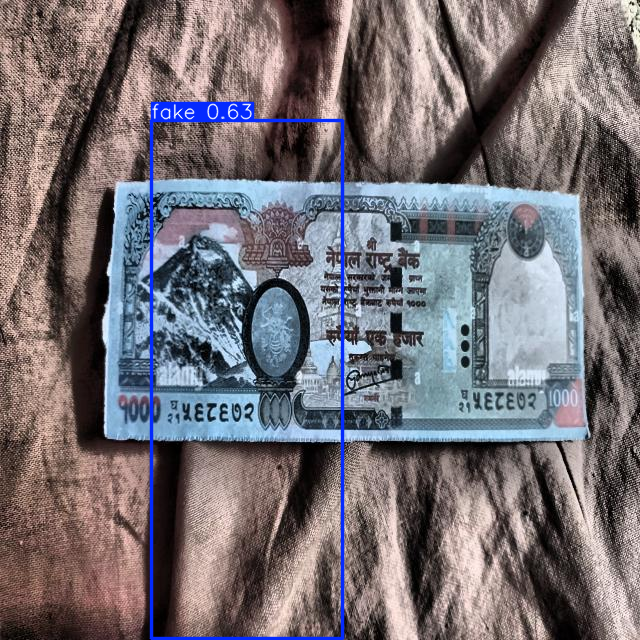

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/yolov8_training_checkpoints/yolov8n_training/weights/best.pt')  # or last.pt

# Perform inference on an image
results = model('/content/drive/MyDrive/images/fake1000.jpg', save=True)

# Display the results
results[0].show()